In [27]:
import os, random, shutil
import pycocotools.coco as cocotool
import numpy as np
import matplotlib.pyplot as plt
import json

In [28]:
# write a script to randomly generate 5 images and run inferencing on them

In [29]:
data_dir = "../data/coco/train2017/"
num_img = 20;
# randomly select five images and save them to directory called rdm_img
rdm_img = []
img_dir = "rdm_img"
# create folder called rdm_img
if (os.path.isdir(img_dir)):
    shutil.rmtree(img_dir) # shutil.rmtree will remove nonempty directory
    os.mkdir(img_dir)
else:
    os.mkdir(img_dir)

In [30]:
# load annotations
annos = "../data/coco/annotations/instances_train2017.json"
coco = cocotool.COCO(annos)

loading annotations into memory...
Done (t=13.91s)
creating index...
index created!


{'license': 3, 'file_name': '000000539967.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000539967.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-22 23:58:28', 'flickr_url': 'http://farm6.staticflickr.com/5477/9943893365_a6de94a990_z.jpg', 'id': 539967}


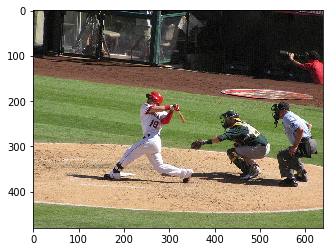

In [31]:
# use pycocotool to get a list of all images with at least a person in it
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds= catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print((img))
img = plt.imread(os.path.join(data_dir, img['file_name']))
plt.imshow(img)

stored image: ../data/coco/train2017/000000554169.jpg
stored image: ../data/coco/train2017/000000496556.jpg
stored image: ../data/coco/train2017/000000440529.jpg
stored image: ../data/coco/train2017/000000148361.jpg
stored image: ../data/coco/train2017/000000517115.jpg
stored image: ../data/coco/train2017/000000193640.jpg
stored image: ../data/coco/train2017/000000348370.jpg
stored image: ../data/coco/train2017/000000126628.jpg
stored image: ../data/coco/train2017/000000281701.jpg
stored image: ../data/coco/train2017/000000152425.jpg
stored image: ../data/coco/train2017/000000305589.jpg
stored image: ../data/coco/train2017/000000160688.jpg
stored image: ../data/coco/train2017/000000215994.jpg
stored image: ../data/coco/train2017/000000002758.jpg
stored image: ../data/coco/train2017/000000135244.jpg
stored image: ../data/coco/train2017/000000454199.jpg
stored image: ../data/coco/train2017/000000231099.jpg
stored image: ../data/coco/train2017/000000340843.jpg
stored image: ../data/coco/t

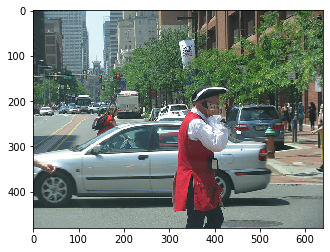

In [32]:
imgs = random.sample(imgIds,num_img)   
for img in imgs:
    # construct pathes to randomly selected images
    img_info = coco.loadImgs(img)[0]
    path = os.path.join(data_dir, img_info['file_name'])
    if os.path.isfile(path):
        curr_img = plt.imread(path)
        plt.imshow(curr_img)
        plt.savefig(os.path.join(img_dir, f'{img}.jpg'))
        print(f'stored image: {path}')
    else:
        raise Exception("Wrong image path")

To run inference do the following:/
1. cd AlphaPose
2. python scripts/demo_inference.py --cfg configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml --checkpoint pretrained_models/fast_res50_256x192.pth --indir examples/demo/

The result json file is stored at location ./AlphaPose/examples/res

In [14]:
# visalization
# init
annos = '../examples/res/alphapose-results.json'
print(type(annos))
cocotool.COCO(annos)
# load annotations
annos = json.loads(annos)
plt.imread()

<class 'str'>
loading annotations into memory...


AssertionError: annotation file format <class 'list'> not supported